In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model, metrics
from math import sqrt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = []
Y = []
Z = []
df  =  pd.read_json('users.json')
df = df[np.isfinite(df['created'])]
df = df[np.isfinite(df['karma'])]
df = df[np.isfinite(df['submitted'])]
XS = df['created']
YS = df['karma']
ZS = df['submitted']
#print(XS)
#print(YS)
#print(ZS)

model = LinearRegression()

today = pd.to_datetime('today')
XS = (today - pd.to_datetime(df['created'],unit='s')).dt.days

X_train, X_test, Y_train, Y_test, Z_train, Z_test= train_test_split(XS,YS,ZS,test_size=0.2)

XZ_train = np.stack([X_train, Z_train], axis=1).reshape(-1 ,2)
XZ_test = np.stack([X_test, Z_test], axis=1).reshape(-1, 2)
model.fit(XZ_train, Y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


predictTest = model.predict(XZ_test)
predictTrain = model.predict(XZ_train)

print('coef: ', str(model.coef_))
print('intercept', str(model.intercept_))


print("mean_absolute_error training data: ", str(mean_absolute_error(Y_train, predictTrain)))
print("mean_absolute_error testing data: ", str(mean_absolute_error(Y_test, predictTest)))

coef:  [ 0.5377011   2.68715271]
intercept -471.96360379
mean_absolute_error training data:  1769.93180152
mean_absolute_error testing data:  1791.90686398


In [4]:
print("mean_squared_error training data: ", str(metrics.mean_squared_error(X_train, predictTrain)))
print("mean_squared_error testing data: ", str(metrics.mean_squared_error(X_test, predictTest)))

mean_squared_error training data:  55316657.06
mean_squared_error testing data:  67109546.5646


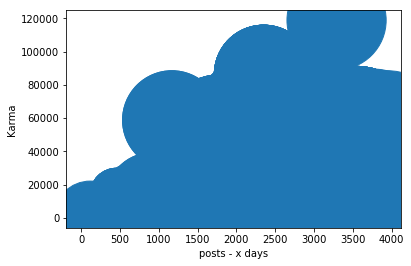

In [5]:
plt.xlabel('posts - x days')
plt.ylabel('Karma')
plt.scatter(X_train, Y_train, Z_train)
plt.show()
#ignore :P

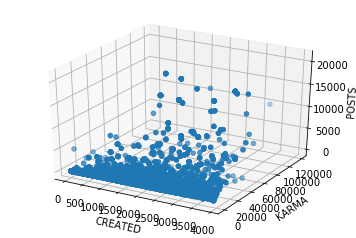

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_train, ys=Y_train, zs=Z_train)
ax.set_xlabel('CREATED')
ax.set_ylabel('KARMA')
ax.set_zlabel('POSTS')
plt.show()

As we can see the number of posts are a more relevant criteria to the rise of karma points. 
Actually we could disregard the days since created compleatle and we would still get pretty accurate predictions.

We can see that by having the additional dimension 'submitted' our model becomes much better at predicting.

#### With mean_absolute_error for testing data:  
1738.04843621 compared to 4648.54663659 for our testing data with only one dimension. 

#### And mean_squared_error testing data:  
55940888.1239 compared to mean_squared_error testing data:  13220996.6899 with only one dimension


In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10)

scaledX = scale(XS)
scaledY = scale(YS)
MAES = []
RSMES = []
accs = []
for train, test in kf.split(XS,YS,ZS):
    XZ = np.stack([XS, ZS], axis=1).reshape(-1, 2)
    XZ_Train, XZ_Test = XZ[train], XZ[test]
    
    Y_Train, Y_Test = scaledX[train], scaledY[test]

    model = linear_model.LinearRegression()
    model.fit(XZ_train, Y_train)

    predict = model.predict(XZ_Test)

    mae = str(metrics.mean_absolute_error(Y_Test, predict))
    rsme = str(sqrt(metrics.mean_squared_error(Y_Test, predict)))
    
    MAES.append(mae)
    RSMES.append(rsme)

    
print('MAE : ' )
print(MAES)
print('RSME : ')
print(RSMES)


print('MAE Average : ' )
#print(MAES)
print(sum([float(i) for i in MAES]))
print('RSME Average : ')
print(sum([float(i) for i in RSMES]))

MAE : 
['4044.14968371', '4009.88638092', '4261.40658729', '4275.89789075', '3543.3472854', '4446.4716559', '4417.14511614', '4215.55970223', '3848.13273631', '4026.79865568']
RSME : 
['8361.727316716544', '8138.851479185262', '8950.345036634992', '8941.342349243285', '8035.240190612455', '9591.428700452094', '8956.00537541358', '8549.250418409509', '7516.927076418384', '8308.083108912346']
MAE Average : 
41088.79569433
RSME Average : 
85349.20105199845


/home/vagrant/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


##### As we can see from the results all 10 slices give us approximately the same results. This means that our data are uniformly distributed.
##### Also the mean_squared_error (RSME) becomes better using Kfold. This is the score that tells us that the error is not very far but close to the linear regression than the old one. But the mean_absolute_error (MAE), the average error in total, becomes a  worse.

In [12]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model as lm, metrics
from pandas import read_csv


url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

df = pd.read_csv(url)
df.columns = ['ID number', 'Diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
              'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
              'SE radius', 'SE texture', 'SE perimeter', 'SE area', 'SE smoothness', 'SE compactness', 'SE concavity',
              'SE concave points', 'SE symmetry', 'SE fractal dimension', 'Worst radius', 'Worst texture',
              'Worst perimeter', 'Worst area', 'Worst smoothness', 'Worst compactness', 'Worst concavity',
              'Worst concave points', 'Worst symmetry', 'Worst fractal dimension']
print('Length: ', str(len(df)))




Length:  568


#### After further inspection of the provided data we added corresponding headers according to the documentation. As we can see, the data-set consist of ID type and 3 sets of 10 values (mean, standard error, and mean of 3 largest value = 'worst')


In [13]:
inpA = ['SE area', 'mean perimeter', 'mean radius']  # size based: in this case bigger is not better
inpB = ['mean smoothness', 'SE area', 'Worst symmetry']  # symmetry based: less symmetrical, higher possibility of being malign

msk = np.random.rand(len(df)) < 0.8 # splitting the data into test and training set
train = df[msk]
test = df[~msk]


inputset = [inpA, inpB]
overallResults = []

for item in inputset:
    X = df[item].values.reshape(-1, len(item))
    Y = df['Diagnosis']     # comparing against actual diagnose

    folds = KFold(n_splits=10)

    accuracies = []

    print()

    for train, test in folds.split(X, Y):
        X_train, X_test = X[train], X[test]
        Y_train, Y_test = Y[train], Y[test]

        lmodel = lm.LogisticRegression()
        lmodel.fit(X_train, Y_train)

        prediction = cross_val_predict(lmodel, X_test, Y_test, cv=10)

        accuracy = metrics.accuracy_score(Y_test, prediction, normalize=True)

        accuracies.append(accuracy)

    overallResults.append(accuracies)

print('Results based on size', str(np.mean(np.array(overallResults[0]).astype(np.float))))
print('Results based on symmetry', str(np.mean(np.array(overallResults[1]).astype(np.float))))




Results based on size 0.882111528822
Results based on symmetry 0.878634085213



#### According to the accuracy score we can say that our model is pretty good. According to the quick research we understand that more asymmetric the cell is, the higher the chance of being malign is. However  we are not oncologists, so we cant say whether our input data were relevant or not.